In [1]:
import pandas as pd
import yfinance as yf

In [8]:
def test_yfinance():
    for symbol in ['AAPL', 'MSFT', 'VFINX','BTC-USD']:
        print(">>", symbol, end=' ... ')
        data = yf.download(symbol, start = '2024-01-01', end='2025-04-23')
        print(data)

test_yfinance()

>> AAPL ... YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-01-02  184.532074  187.315366  182.792518  186.033057  82488700
2024-01-03  183.150375  184.770652  182.335262  183.120556  58414500
2024-01-04  180.824356  181.997307  179.800504  181.062914  71983600
2024-01-05  180.098694  181.669266  179.094727  180.903872  62303300
2024-01-08  184.452560  184.492330  180.416793  181.003268  59144500
...                ...         ...         ...         ...       ...
2025-04-15  202.139999  203.509995  199.800003  201.860001  51343900
2025-04-16  194.270004  200.699997  192.369995  198.360001  59732400
2025-04-17  196.979996  198.830002  194.419998  197.199997  51334300
2025-04-21  193.160004  193.800003  189.809998  193.270004  46742500
2025-04-22  199.740005  201.589996  195.970001  196.119995  52976400

[327 rows x 5 columns]
>> MSFT ..

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open Volume
Ticker           VFINX       VFINX       VFINX       VFINX  VFINX
Date                                                             
2024-01-02  431.003601  431.003601  431.003601  431.003601      0
2024-01-03  427.565948  427.565948  427.565948  427.565948      0
2024-01-04  426.157410  426.157410  426.157410  426.157410      0
2024-01-05  426.935547  426.935547  426.935547  426.935547      0
2024-01-08  432.963715  432.963715  432.963715  432.963715      0
...                ...         ...         ...         ...    ...
2025-04-15  498.230011  498.230011  498.230011  498.230011      0
2025-04-16  487.070007  487.070007  487.070007  487.070007      0
2025-04-17  487.720001  487.720001  487.720001  487.720001      0
2025-04-21  476.260010  476.260010  476.260010  476.260010      0
2025-04-22  488.230011  488.230011  488.230011  488.230011      0

[327 rows x 5 columns]
>> BTC-USD ... Price              Close          Hig

[*********************100%***********************]  1 of 1 completed
C:\Users\valdi\miniconda3\envs\energy\Lib\site-packages\numpy\_core\fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
[*********************100%***********************]  1 of 1 completed

>> IGE ... sharpe_ratio Ticker
IGE    0.787168
dtype: float64
maxDrawdown -0.09686772789379328
maxDrawdownDuration 498.0
startDrawdownDay 1290
sharpe_ratio 0.7695255237557247


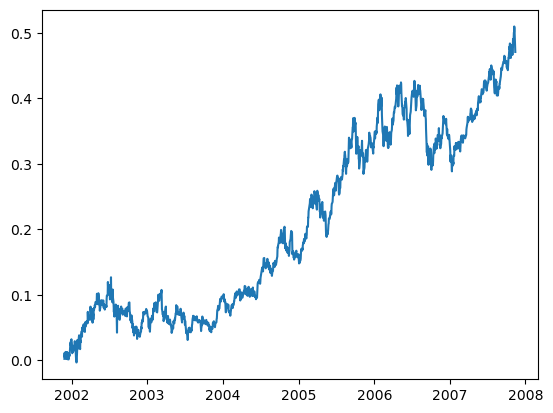

In [32]:
import matplotlib.pyplot as plt
import numpy as np

def calc_max_dd(cum_ret):
    high_watermark = np.zeros(cum_ret.shape)
    drawdown = np.zeros(cum_ret.shape)
    drawdown_duration = np.zeros(cum_ret.shape)

    for n in np.arange(1, cum_ret.shape[0]):
        high_watermark[n] = np.maximum(high_watermark[n-1], cum_ret[n])
        drawdown[n] = (1 + cum_ret[n]) / (1 + high_watermark[n]) - 1
        if drawdown[n] == 0:
            drawdown_duration[n] = 0
        else:
            drawdown_duration[n] = drawdown_duration[n-1] + 1

    max_dd, i = np.min(drawdown), np.argmin(drawdown) # drawdown < 0 always
    max_ddd = np.max(drawdown_duration)
    return max_dd, max_ddd, i

def calc_ige_sharpe():
    for symbol in ['IGE']:
        print(">>", symbol, end=' ... ')
        data = yf.download(symbol, start = '2001-11-26', end='2007-11-14')

        data.sort_values(by = 'Date', inplace = True)
        daily_return = data.loc[:, 'Close'].pct_change() # daily returns

        excess_return = daily_return - 0.04/252 # daily returns = strategy returns - financing cost

        sharpe_ratio = np.sqrt(252) * np.mean(excess_return) / np.std(excess_return)

        print("sharpe_ratio", sharpe_ratio)

        spy_df = yf.download('SPY', start = '2001-11-26', end='2007-11-14')

        df_merge = pd.merge(data, spy_df, on = 'Date', suffixes=('_IGE', '_SPY'))
        df_merge.sort_index(inplace = True)

        daily_return = df_merge[[('Close', 'IGE'), ('Close', 'SPY')]].pct_change()

        net_return = (daily_return[('Close', 'IGE')] - daily_return[('Close', 'SPY')])/2

        cum_ret = np.cumprod(1+net_return) - 1
        plt.plot(cum_ret)
        maxDrawdown, maxDrawdownDuration, startDrawdownDay = calc_max_dd(cum_ret.values)
        print("maxDrawdown", maxDrawdown)
        print("maxDrawdownDuration",maxDrawdownDuration)
        print("startDrawdownDay",startDrawdownDay)

        sharpe_ratio = np.sqrt(252) * np.mean(net_return) / np.std(net_return)
        print("sharpe_ratio", sharpe_ratio)

calc_ige_sharpe()